# DRFPMI with arm cavity mirror map

### I referred to Mr. Munemiya's document (Calculating Higher-Order Modes with FINESSE.pdf).

All were tuned visually.

In [2]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import numpy as np
  
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



## The base configuration
#### DRFPMI interferometer with ITM and ETM mirror maps

In [3]:
base =finesse.kat()
base.verbose=False

base.parse("""
    # ======== Constants ========================
    const f1 16.881M
    const f2 45.0159M
    const mf1 -16.881M
    const mf2 -45.0159M
    const a 0.686
    const pi 3.1415
    
    # ======== Input optics =====================
    l i1 1 0 n0
    s s_eo0 0 n0 n_eo1
    mod eom1 $f1 0.3 1 pm n_eo1 n_eo2
    s s_eo1 0 n_eo2 n_eo3
    mod eom2 $f2 0.3 1 pm n_eo3 n_eo4
    s s_eo2 0 n_eo4 nREFL

    # ======= PRC each mirror loss 45ppm =======
    # PRC
    m1 PRM 0.1 45e-6 90 nREFL npr1
    s sLpr1 14.7615 npr1 npr2
    bs1 PR2 500e-6 45e-6 0 $a npr3 npr2 nPOP nPOP2
    s sLpr2 11.0661 npr3 npr4
    bs1 PR3 50e-6 45e-6 0 $a dump dump npr4 npr5
    s sLpr3 15.7638 npr5 npr6

    # ======= Michelson ========================
    bs bs1 0.5 0.5 0 45 npr6 n2 n3 n4
    s lx 26.4018 n3 nx1		#26.6649-thickness*1.754
    s ly 23.072 n2 ny1		#23.3351-thickness*1.754


    # ======== Thick ITMs ======================
    m IXAR 0     1     0 nx1 nx2
    s thick_IX 0.15 1.754 nx2 nx3
    m ITMX 0.996 0.004 0 nx3 nx4

    m IYAR 0     1     0 ny1 ny2
    s thick_IY 0.15 1.754 ny2 ny3
    m ITMY 0.996 0.004 90 ny3 ny4

    # ========== Arm     =======================
    s sx1 3000 nx4 nx5
    m ETMX 0.999995 5e-06 0 nx5 nTMSX

    s sy1 3000 ny4 ny5
    m ETMY 0.999995 5e-06 90 ny5 nTMSY


    # ========= SRC each mirror loss 45ppm =======
    s sLsr3 15.7386 n4 nsr5
    bs1 SR3 50e-6 45e-6 0 $a nsr5 nsr4 dump dump
    s sLsr2 11.1115 nsr4 nsr3
    bs1 SR2 500e-6 45e-6 0 $a nsr2 nsr3 nPOS dump
    s sLsr1 14.7412 nsr2 nsr1
    m1 SRM 0.3 0e-6 90 nsr1 nAS

    # =========  HOM Expansion =======
    attr PRM Rc -458.1285
    attr PR2 Rc -3.0764
    attr PR3 Rc -24.9165
    attr bs1 Rc 0
    attr ITMX Rc -1900.   # measured -1904.6
    attr ETMX Rc 1900.    # measured  1908.24
    attr ITMY Rc -1900    # measured -1904.4
    attr ETMY Rc 1900.    # measured  1905.55
    attr SRM Rc 458.1285
    attr SR2 Rc -2.9872
    attr SR3 Rc 24.9165
    attr IXAR Rc 0
    attr IYAR Rc 0
    # =========  cavity and gauss commands =======
    cav XARM ITMX nx4 ETMX nx5
    cav YARM ITMY ny4 ETMY ny5
    cav PRX PRM npr1 ITMX nx3
    cav PRY PRM npr1 ITMY ny3
    cav SRX SRM nsr1 ITMX nx3
    cav SRY SRM nsr1 ITMY ny3
    maxtem 5
    
    
    # ========  tuning =======
    pd0 pd0_DC_TMSX nTMSX #ETMx transmission
    xaxis* ETMX phi lin -90 90 1000
    yaxis lin abs
    pause 3
    trace 2
    """)
a = base.run()
print(a.rundata)
plt.figure(1)
plt.semilogy(a.x, a["pd0_DC_TMSX"])
print(l.index(max(a["pd0_DC_TMSX"])))


 --- cavity tracing
 cavity XARM:
  cavity is stable! Eigenvalues:
  q=-1500+774.597j, w0=16.1969667343171mm z=-1.5km m=-0.32964
  finesse : 1565.7, round-trip power loss: 0.00400498 [/100]
  opt. length: 6km, FSR: 49.9654096666667kHz, m: -329.639889196676m
  FWHM: 31.9125278380535Hz (pole: 15.9562639190267Hz)
  (x) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  (y) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  RT Gouy: -109.246919696117 deg (mode sep.: -15.162686381772kHz)
 cavity YARM:
  cavity is stable! Eigenvalues:
  q=-1500+774.597j, w0=16.1969667343171mm z=-1.5km m=-0.32964
  finesse : 1565.7, round-trip power loss: 0.00400498 [/100]
  opt. length: 6km, FSR: 49.9654096666667kHz, m: -329.639889196676m
  FWHM: 31.9125278380535Hz (pole: 15.9562639190267Hz)
  (x) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  (y) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  RT Gouy: -109.246919696117 deg (mode sep.: -15.162686381772kHz)
 cavity PRX:
  

NameError: name 'l' is not defined

## process 1-3
1. Write down the distance between mirrors and the radius of curvature.
It may shift a little if you fine-tune it in FINESSE, but the mirror to be ordered is the one written in the Wiki, and fine-tuning is not possible. Fine-tune only the phase of the mirror.

2. Remove the Schnupp asymmetry and curvature errors.
First we need to align the modes of both arms to match the mode of the incident beam to the arms.
We do not remove the loss imbalance.
In addition, the wedge angle and fold angle should be set to 0 degrees.
No mirror map is included at this point.The "cav" command is for both arms only.

3. Get the beam parameters.
Add the command line "trace 8", set up some calculations, and run FINESSE. You will see the beam profile at each point in the log file.
Look at the profile at the point where you installed the laser and get the waist position and Rayleigh range.
Note that if the profile is oriented from the EOM to the laser, the sign of the waist position will be reversed. Command "maxtem" is set to 5.



 1. Wikiに書いてある鏡間距離と曲率半径を書き込む
FINESSEで微調整すれば少しずれることもあるが、発注する鏡はWikiに書いてあるものであり、微調整はできない。微調整は鏡の位相だけで行う。


 2. アシンメトリなどを除去する
 まずは入射ビームのモードを腕に合わせる。
 そのために両腕のモードを揃えておく必要がある。
 除去するのは、Schnuppアシンメトリと曲率誤差で、
 ロスインバランスは残してもよい。
 さらに、ウェッジ角と折り返し角も0度にしておく。
 この時点でミラーマップは入れない。cavコマンドは両腕のみ。

 3. ビームパラメタを取得する(tuning1.kat)
 "trace 8"というコマンドラインを追加し、どんな計算でもいいからFINESSEを走らせると、各点でのビームプロファイルがログファイルに表示される。
レーザーを設置した点でのプロファイルを見て、ウェスト位置とレイリーレンジを得る。
プロファイルの向きがEOMからレーザーに向かっている場合は、ウェスト位置の符号が逆になることに注意。maxtemは5にしている。

In [36]:
# Average length of schnap asymmetry
thickness=0.15
lx=26.6649-thickness*1.754 
ly=23.3351-thickness*1.754
print("lx=",lx,",ly=",ly)
l=(lx+ly)/2
print("l=",l)

lx= 26.401799999999998 ,ly= 23.072
l= 24.7369


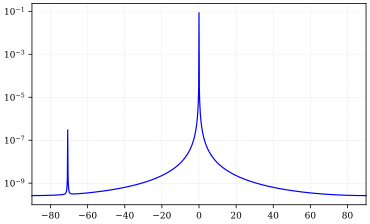

In [14]:
base_3 =finesse.kat()
base_3.verbose=False
base_3.parse('''
    # ======== Constants ========================
    const f1 16.881M
    const f2 45.0159M
    const mf1 -16.881M
    const mf2 -45.0159M
    const a 0.686
    const pi 3.1415
    
    # ======== Input optics =====================
    l i1 1 0 n0
    s s_eo0 0 n0 n_eo1
    mod eom1 $f1 0.0 1 pm n_eo1 n_eo2       #modulation index=0 
    s s_eo1 0 n_eo2 n_eo3
    mod eom2 $f2 0.0 1 pm n_eo3 n_eo4       #modulation index=0 
    s s_eo2 0 n_eo4 nREFL

    # ======= PRC each mirror loss 45ppm =======
    # PRC
    m1 PRM 0.1 45e-6 90 nREFL npr1
    s sLpr1 14.7615 npr1 npr2
    #bs1 PR2 500e-6 45e-6 0 $a npr3 npr2 nPOP nPOP2
    bs1 PR2 0 0 0 0 npr3 npr2 nPOP nPOP2
    s sLpr2 11.0661 npr3 npr4
    #bs1 PR3 50e-6 45e-6 0 $a dump dump npr4 npr5
    bs1 PR3 0 0 0 0 dump dump npr4 npr5
    s sLpr3 15.7638 npr5 npr6

    # ======= Michelson ========================
    bs bs1 0.5 0.5 0 45 npr6 n2 n3 n4
    s lx 24.7369 n3 nx1		#(lx+ly)/2 lx=26.401799999999998
    s ly 24.7369 n2 ny1		#(lx+ly)/2 ly=23.072


    # ======== Thick ITMs ======================
    m IXAR 0     1     0 nx1 nx2
    s thick_IX 0.15 1.754 nx2 nx3
    m ITMX 0.996 0.004 0 nx3 nx4

    m IYAR 0     1     0 ny1 ny2
    s thick_IY 0.15 1.754 ny2 ny3
    m ITMY 0.996 0.004 90 ny3 ny4

    # ========== Arm     =======================
    s sx1 3000 nx4 nx5
    m ETMX 0.999995 5e-06 0 nx5 nTMSX

    s sy1 3000 ny4 ny5
    m ETMY 0.999995 5e-06 90 ny5 nTMSY


    # ========= SRC each mirror loss 45ppm =======
    s sLsr3 15.7386 n4 nsr5
    #bs1 SR3 50e-6 45e-6 0 $a nsr5 nsr4 dump dump
    bs1 SR3 50e-6 45e-6 0 $a nsr5 nsr4 dump dump
    s sLsr2 11.1115 nsr4 nsr3
    #bs1 SR2 500e-6 45e-6 0 $a nsr2 nsr3 nPOS dump
    bs1 SR2 0 0 0 $a nsr2 nsr3 nPOS dump
    s sLsr1 14.7412 nsr2 nsr1
    m1 SRM 0.3 0e-6 90 nsr1 nAS

    # =========  HOM Expansion =======
    attr PRM Rc -458.1285
    attr PR2 Rc -3.0764
    attr PR3 Rc -24.9165
    attr bs1 Rc 0
    attr ITMX Rc -1900.   # measured -1904.6
    attr ETMX Rc 1900.    # measured  1908.24
    attr ITMY Rc -1900    # measured -1904.4
    attr ETMY Rc 1900.    # measured  1905.55
    attr SRM Rc 458.1285
    attr SR2 Rc -2.9872
    attr SR3 Rc 24.9165
    attr IXAR Rc 0
    attr IYAR Rc 0

    # =========  cavity and gauss commands =======
    cav XARM ITMX nx4 ETMX nx5
    cav YARM ITMY ny4 ETMY ny5
    #cav PRX PRM npr1 ITMX nx3
    #cav PRY PRM npr1 ITMY ny3
    #cav SRX SRM nsr1 ITMX nx3
    #cav SRY SRM nsr1 ITMY ny3
    maxtem 5
    
    
    
    # ======= sweep ETMX ============
    pd0 pd0_DC_TMSX nTMSX #ETMx transmission
    xaxis* ETMX phi lin -90 90 1000
    yaxis lin abs
    phase 3
    trace 10
    ''')
a_3 = base_3.run()
#print(a_3.rundata)

plt.figure(1)
plt.semilogy(a_3.x, a_3["pd0_DC_TMSX"])

#print(max(a_3["pd0_DC_TMSX"]))
#maxIndex = [i for i, x in enumerate(a_3["pd0_DC_TMSX"]) if x == max(a_3["pd0_DC_TMSX"])]
#print(maxIndex) 
#print(a_3.x[maxIndex])
#print(a_3["pd0_DC_TMSX"].index('max(a_3["pd0_DC_TMSX"])'))

In [6]:
3e8/(2*3000)

50000.0

In [7]:
500000/1.56e3

320.5128205128205

In [12]:
#2π*Finesse
2*np.pi/1.56e3

0.004027682889217683

In [13]:
1064e-9/(2*np.pi)*(2*np.pi/1.56e3)

6.820512820512821e-10

## process 4

In [ ]:
4. Adjust the phase by adding a mirror map.
    Bring back the removed asymmetry and fold angles.
    Set the reflectivity of the PRM and SRM to zero.
    Set the cav command also to both arms only. 
    Modulation should be turned off.
    With the ITM mirror and the ETM mirror in, adjust the ETM tuning phase so that the transmitted light of the arms is maximized.
    Tun the x-arm and yarm separately.
    If the mirror map is put only in ETMx, the optimal phase of ETMy should be zero.

    The next step is to adjust the phase of the BS.
    The ETMs of the Xarm and Yarm are tuned after setting the tuning phase.
    Adjust the BS tuning phase so that the transmitted light of SRM is minimized.
    The tuning phase of the x-arm and y-arm should be set to the seventh significant digit.
    If the tuning of the x-arm and yarm is lax, the tuning of the BS will not match exactly.
    Once cavity is out of resonance, the knm command automatically rewrites the file. In this case, the file name was intentionally changed in process5.

 4. ミラーマップを入れて位相の調整。
除去したアシンメトリや折り返し角を戻す。
 PRMとSRMの反射率をゼロにします。
cavコマンドも両腕のみに設定します。 
変調はOFF にする。
ITMのミラーとETMのミラーを入れた状態で、腕の透過光が最大になるようにETMのtuning位相を合わせる。
xアームおよびyarｍをそれぞれ別々でtuningする。
ETMxにのみミラーマップを入れた場合、ETMyの最適位相はゼロのはずである。
次に、BS の位相の調整を行う。
XarmとYアームのETM はtuning位相を設定したのち、
SRM の透過光が最小になるようにBSのtuning位相を合わせる。
X アーム、Y アームのチューニング位相は、有効数字の 7 桁目に設定した方が良いです。(波長(1064nm)の整数倍)
((2*np.pi)/Finesse=0.00403[rad]ここまで合わせれば良いが、XアームとYアームのチューニングはtuningが甘いと、BSのチューニングが正確に一致しません。)
knmコマンドはcavityが共振から外れたら、自動で新しくファイルを書き換える。今回はprocess5で敢えてファイル名を変えている
    

[0.0258]
[0.0262]


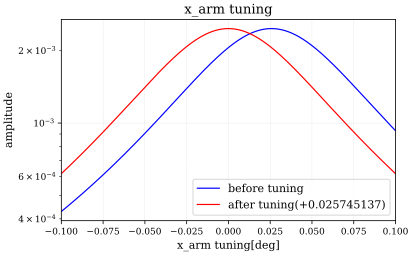

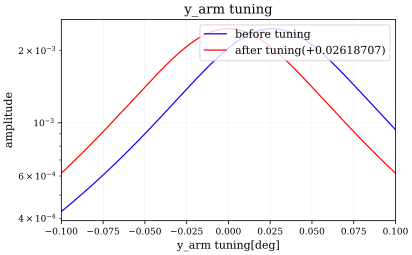

In [7]:

base_4 = finesse.kat()
base_4.verbose=False
base_4.parse("""

    # ======== Constants ========================
    const f1 16.881M
    const f2 45.0159M
    const mf1 -16.881M
    const mf2 -45.0159M
    const a 0.686
    const pi 3.1415
    
    # ======== Input optics =====================
    l i1 1 0 n0
    #s s_eo0 0 n0 n_eo1
    #mod eom1 $f1 0.0 1 pm n_eo1 n_eo2       #modulation index=0 
    #s s_eo1 0 n_eo2 n_eo3
    #mod eom2 $f2 0.0 1 pm n_eo3 n_eo4       #modulation index=0 
    s s_eo2 0 n0 nREFL

    # ======= PRC each mirror loss 45ppm =======
    # PRC
    m1 PRM 1 0 90 nREFL npr1
    s sLpr1 14.7615 npr1 npr2
    #bs1 PR2 500e-6 45e-6 0 $a npr3 npr2 nPOP nPOP2
    bs1 PR2 0 0 0 $a npr3 npr2 nPOP nPOP2
    s sLpr2 11.0661 npr3 npr4
    #bs1 PR3 50e-6 45e-6 0 $a dump dump npr4 npr5
    bs1 PR3 0 0 0 $a dump dump npr4 npr5
    s sLpr3 15.7638 npr5 npr6

    # ======= Michelson ========================
    #bs bs1 0.5 0.5 0.00999985 45 npr6 n2 n3 n4 #after tuning   #0.01+0.15e-6
    bs bs1 0.5 0.5 0.0 45.0 npr6 n2 n3 n4
    s lx 26.401799999999998 n3 nx1
    s ly 23.072 n2 ny1


    # ======== Thick ITMs ======================
    m IXAR 0     1     0 nx1 nx2
    s thick_IX 0.15 1.754 nx2 nx3
    m ITMX 0.996 0.004 0 nx3 nx4

    m IYAR 0     1     0 ny1 ny2
    s thick_IY 0.15 1.754 ny2 ny3
    m ITMY 0.996 0.004 90 ny3 ny4

    # ========== Arm     =======================
    s sx1 3000 nx4 nx5
    m ETMX 0.999995 5e-06 0.0 nx5 nTMSX
    #m ETMX 0.99995 5e-06 0.025745137 nx5 nTMSX      #after tuning
    

    s sy1 3000 ny4 ny5
    m ETMY 0.999995 5e-06 90 ny5 nTMSY
    #m ETMY 0.99995 5e-06 90.02618707 ny5 nTMSY    #after tuning　#(2*np.pi)/Finesse=0.00403[rad]ここまで合わせれば良いがBSがいうことを聞かない
    

    # ========= SRC each mirror loss 45ppm =======
    s sLsr3 15.7386 n4 nsr5
    #bs1 SR3 50e-6 45e-6 0 $a nsr5 nsr4 dump dump
    bs1 SR3 50e-6 45e-6 0 $a nsr5 nsr4 dump dump
    s sLsr2 11.1115 nsr4 nsr3
    #bs1 SR2 500e-6 45e-6 0 $a nsr2 nsr3 nPOS dump
    bs1 SR2 0 0 0 $a nsr2 nsr3 nPOS dump
    s sLsr1 14.7412 nsr2 nsr1
    m1 SRM 1 0 0 nsr1 nAS

    # =========  HOM Expansion =======
    attr PRM Rc -458.1285
    attr PR2 Rc -3.0764
    attr PR3 Rc -24.9165
    attr bs1 Rc 0
    attr ITMX Rc -1900.   # measured -1904.6
    attr ETMX Rc 1900.    # measured  1908.24
    attr ITMY Rc -1900    # measured -1904.4
    attr ETMY Rc 1900.    # measured  1905.55
    attr SRM Rc 458.1285
    attr SR2 Rc -2.9872
    attr SR3 Rc 24.9165
    attr IXAR Rc 0
    attr IYAR Rc 0

    # =========  cavity and gauss commands =======
    cav XARM ITMX nx4 ETMX nx5
    cav YARM ITMY ny4 ETMY ny5
    #cav PRX PRM npr1 ITMX nx3
    #cav PRY PRM npr1 ITMY ny3
    #cav SRX SRM nsr1 ITMX nx3
    #cav SRY SRM nsr1 ITMY ny3
    maxtem 5
    gauss* input i1 n0 -7.52069352993567 57.7078536063058   
    
""")
base_4_x = base_4.deepcopy()
base_4_x.parse("""
    # =========  x-arm mirror map =======
    map ITMX ITMXhr.txt     #The effect of a phase map on the reflected field
    knm ITMX ITMXhrDRFPMI4
    conf ITMX save_knm_binary 1
    conf ITMX interpolation_method 2
    conf ITMX integration_method 1
    conf ITMX knm_change_q 2
   
    map ITMX Apperture.txt  #Aperture
    knm ITMX ITMXabsDRFPMI4
    conf ITMX save_knm_binary 1
    conf ITMX interpolation_method 2
    conf ITMX integration_method 1
    
    
    map ETMX ETMXhr.txt
    knm ETMX ETMXhrDRFPMI4
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1

    map ETMX Apperture.txt
    knm ETMX ETMXabsDRFPMI4
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1
    
    pd0 pd0_DC_TMSX nTMSX
    ### tuning x-arm
    xaxis* ETMX phi lin -0.1 0.1 1000  
    yaxis lin abs
    phase 3
    trace 2
   
    """)

base_4_y = base_4.deepcopy()
base_4_y.parse("""
    # =========  y-arm mirror map =======
    map ITMY Apperture.txt
    knm ITMY ITMYabsDRFPMI4
    conf ITMY save_knm_binary 1
    conf ITMY interpolation_method 2
    conf ITMY integration_method 1

    map ITMY ITMYhr.txt
    knm ITMY ITMYhrDRFPMI4
    conf ITMY save_knm_binary 1
    conf ITMY interpolation_method 2
    conf ITMY integration_method 1

    map ETMY Apperture.txt
    knm ETMY ETMYabsDRFPMI4
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1

    map ETMY ETMYhr.txt
    knm ETMY ETMYhrDRFPMI4
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1
    
    pd0 pd0_DC_TMSY nTMSY
    ### tuning y-arm
    xaxis* ETMY phi lin -0.1 0.1 1000
    yaxis lin abs
    phase 3
    trace 2
   
    
    """)


a_4_x = base_4_x.run()
#print(a_4_x.rundata)
#print(a_4_y.rundata)
base_4_x_1 = base_4_x.deepcopy()
base_4_x_1.ETMX.phi=0.025745137
a_4_x_1 = base_4_x_1.run()

#plot 
plt.figure(1)
plt.semilogy(a_4_x.x, a_4_x["pd0_DC_TMSX"],label="before tuning")
plt.semilogy(a_4_x_1.x, a_4_x_1["pd0_DC_TMSX"],label="after tuning(+0.025745137)")
plt.title('x_arm tuning')
plt.legend(loc=1)
plt.xlabel("x_arm tuning[deg]")
plt.ylabel("amplitude")
##Give the phase at the maximum value.
maxIndexX = [i for i, x in enumerate(a_4_x["pd0_DC_TMSX"]) if x == max(a_4_x["pd0_DC_TMSX"])]
print(a_4_x.x[maxIndexX])
plt.legend()

a_4_y = base_4_y.run()
base_4_y_1 = base_4_y.deepcopy()
base_4_y_1.ETMY.phi=90.02618707
a_4_y_1 = base_4_y_1.run()

#plot 
plt.figure(2)
plt.semilogy(a_4_y.x, a_4_y["pd0_DC_TMSY"],label="before tuning")
plt.semilogy(a_4_y_1.x, a_4_y_1["pd0_DC_TMSY"],label="after tuning(+0.02618707)")
plt.title('y_arm tuning')
plt.legend(loc=1)
plt.xlabel("y_arm tuning[deg]")
plt.ylabel("amplitude")
##Give the phase at the maximum value.
maxIndexY = [i for i, x in enumerate(a_4_y["pd0_DC_TMSY"]) if x == max(a_4_y["pd0_DC_TMSY"])]
print(a_4_y.x[maxIndexY])

0.02574
90.02618
No handles with labels found to put in legend.
No handles with labels found to put in legend.

 --- cavity tracing
 cavity XARM:
  cavity is stable! Eigenvalues:
  q=-1500+774.597j, w0=16.1969667343171mm z=-1.5km m=-0.32964
  finesse : 1565.7, round-trip power loss: 0.00400498 [/100]
  opt. length: 6km, FSR: 49.9654096666667kHz, m: -329.639889196676m
  FWHM: 31.9125278380535Hz (pole: 15.9562639190267Hz)
  (x) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  (y) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  RT Gouy: -109.246919696117 deg (mode sep.: -15.162686381772kHz)
 cavity YARM:
  cavity is stable! Eigenvalues:
  q=-1500+774.597j, w0=16.1969667343171mm z=-1.5km m=-0.32964
  finesse : 1565.7, round-trip power loss: 0.00400498 [/100]
  opt. length: 6km, FSR: 49.9654096666667kHz, m: -329.639889196676m
  FWHM: 31.9125278380535Hz (pole: 15.9562639190267Hz)
  (x) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  (y) A: -2.1578947 B: -3473.684

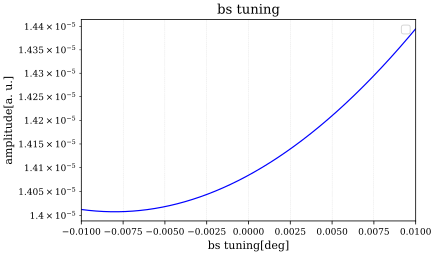

In [32]:
base_4_bs = base_4.deepcopy()

#add tuning phase(ETMX,ETMY) 
base_4_bs.ETMX.phi=0+a_4_x.x[maxIndexX]
base_4_bs.ETMY.phi=90+a_4_y.x[maxIndexY]
print(base_4_bs.ETMX.phi)
print(base_4_bs.ETMY.phi)
base_4_bs.parse("""
    # =========  x-arm mirror map =======
    map ITMX ITMXhr.txt
    knm ITMX ITMXhrDRFPMI4
    conf ITMX save_knm_binary 1
    conf ITMX interpolation_method 2
    conf ITMX integration_method 1
    conf ITMX knm_change_q 2
   
    map ITMX Apperture.txt
    knm ITMX ITMXabsDRFPMI4
    conf ITMX save_knm_binary 1
    conf ITMX interpolation_method 2
    conf ITMX integration_method 1
    
    
    map ETMX ETMXhr.txt
    knm ETMX ETMXhrDRFPMI4
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1

    map ETMX Apperture.txt
    knm ETMX ETMXabsDRFPMI4
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1

    # =========  y-arm mirror map =======
    map ITMY Apperture.txt
    knm ITMY ITMYabsDRFPMI4
    conf ITMY save_knm_binary 1
    conf ITMY interpolation_method 2
    conf ITMY integration_method 1

    map ITMY ITMYhr.txt
    knm ITMY ITMYhrDRFPMI4
    conf ITMY save_knm_binary 1
    conf ITMY interpolation_method 2
    conf ITMY integration_method 1

    map ETMY Apperture.txt
    knm ETMY ETMYabsDRFPMI4
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1

    map ETMY ETMYhr.txt
    knm ETMY ETMYhrDRFPMI4
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1
    
    # ======== tuning BS =========
    pd0 pd0_DC_AS nAS
    variable dphi 1
    xaxis dphi abs lin -0.01 0.01 10000
    put* ETMX phi $x1
    put* ITMX phi $x1
    put* ETMY phi $mx1
    put* ITMY phi $mx1
    phase 3
    trace 2

    """)

a_4_bs = base_4_bs.run()
print(a_4_bs.rundata)
plt.figure(3)
plt.semilogy(a_4_bs.x, a_4_bs["pd0_DC_AS"])
plt.title('bs tuning')
plt.legend(loc=1)
plt.xlabel("bs tuning[deg]")
plt.ylabel("amplitude[a. u.]")
plt.legend()
#minIndex = [i for i, x in enumerate(a_4_bs["pd0_DC_AS"]) if x == min(a_4_bs["pd0_DC_AS"])]
print(a_4_bs.x[minIndex])


## process 5

5． Put in the mirror map and adjust the phase.
Restore the reflectance of PRM and SRM.
Add PRC and SRC with cav command.
Create a new knm file again.
Adjust the phase of PRM to maximize the transmitted light of the arm.
Then, using ad, adjust the phase of SRM so that the 10kHz signal generated by shaking the arm differentially is maximized.
If the mirror map is put into PRC, SRC, BS, or ITM, process5 is required.
Also, if the phase of PRC is shifted after tuning SRC, adjust PRC.
The interferometer configuration at this time is Broadband RSE. If you want to use Detuned RSE, shift the tuning phase of SRM by another 3.5 degrees from this state.

 5. ミラーマップを入れて位相の調整。
PRMとSRMの反射率を元に戻す。
cavコマンドでPRCとSRCを追加する。
またknmファイルを新しく作る。
腕の透過光が最大になるようにPRMの位相を調整する。
次にadを用いて、腕を差動に振って生成した10kHzの信号が最大になるようにSRMの位相を調整する。
ミラーマップをPRC、SRC、BS、ITMのいずれかに入れた場合はprocess5が必要です。
またSRCをtuningしたのちに、PRCの位相がずれた場合、PRCの調整をしてください。

このときの干渉計構成は、Broadband RSEである。もし Detuned RSEにする場合は、SRMのtuning位相をこの状態からさらに3.5度ずらす。

No handles with labels found to put in legend.

 --- cavity tracing
 cavity XARM:
  cavity is stable! Eigenvalues:
  q=-1500+774.597j, w0=16.1969667343171mm z=-1.5km m=-0.32964
  finesse : 1548.34, round-trip power loss: 0.0040498 [/100]
  opt. length: 6km, FSR: 49.9654096666667kHz, m: -329.639889196676m
  FWHM: 32.2703889304753Hz (pole: 16.1351944652377Hz)
  (x) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  (y) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  RT Gouy: -109.246919696117 deg (mode sep.: -15.162686381772kHz)
 cavity YARM:
  cavity is stable! Eigenvalues:
  q=-1500+774.597j, w0=16.1969667343171mm z=-1.5km m=-0.32964
  finesse : 1548.34, round-trip power loss: 0.0040498 [/100]
  opt. length: 6km, FSR: 49.9654096666667kHz, m: -329.639889196676m
  FWHM: 32.2703889304753Hz (pole: 16.1351944652377Hz)
  (x) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  (y) A: -2.1578947 B: -3473.6842 C: 0.0012188366 D: 1.498615
  RT Gouy: -109.246919696117 deg (

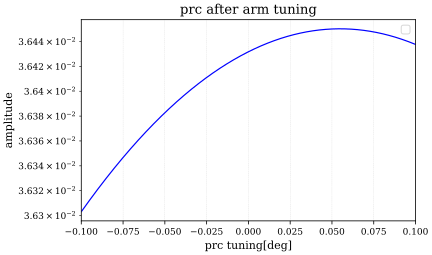

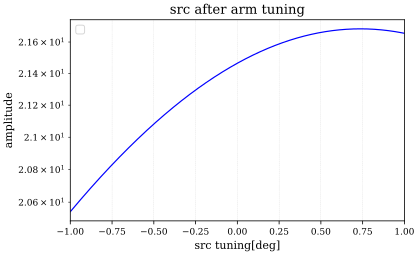

In [34]:
base_5 = finesse.kat()
base_5.verbose=False
base_5.parse("""


    # ======== Constants ========================
    const f1 16.881M
    const f2 45.0159M
    const mf1 -16.881M
    const mf2 -45.0159M
    const a 0.686
    const pi 3.1415
    
    # ======== Input optics =====================
    l i1 1 0 n0
    s s_eo0 0 n0 n_eo1
    mod eom1 $f1 0.0 1 pm n_eo1 n_eo2       #modulation index=0 
    s s_eo1 0 n_eo2 n_eo3
    mod eom2 $f2 0.0 1 pm n_eo3 n_eo4       #modulation index=0 
    s s_eo2 0 n_eo4 nREFL

    # ======= PRC each mirror loss 45ppm =======
    # PRC
    m1 PRM 0.1 45e-6 90.0 nREFL npr1          #Add transmittance and reflectance
    #m1 PRM 0.1 45e-6 90.05623025 nREFL npr1   #after tuning#90-0.056
    s sLpr1 14.7615 npr1 npr2
    bs1 PR2 500e-6 45e-6 0 $a npr3 npr2 nPOP nPOP2  #Add wrapping angle,transmittance and reflectance
    s sLpr2 11.0661 npr3 npr4
    bs1 PR3 50e-6 45e-6 0 $a dump dump npr4 npr5 #Add wrapping angle,transmittance and reflectance
    s sLpr3 15.7638 npr5 npr6
    
    # ======= Michelson ========================
    bs bs1 0.5 0.5 0.007998 45 npr6 n2 n3 n4
    s lx 26.401799999999998 n3 nx1
    s ly 23.072 n2 ny1

    # ======== Thick ITMs ======================
    m IXAR 0     1     0 nx1 nx2
    s thick_IX 0.15 1.754 nx2 nx3
    m ITMX 0.996 0.004 0 nx3 nx4

    m IYAR 0     1     0 ny1 ny2
    s thick_IY 0.15 1.754 ny2 ny3
    m ITMY 0.996 0.004 90 ny3 ny4

    # ========== Arm     =======================
    s sx1 3000 nx4 nx5
    m ETMX 0.99995 5e-06 0.025745137 nx5 nTMSX
    

    s sy1 3000 ny4 ny5
    m ETMY 0.99995 5e-06 90.02618707 ny5 nTMSY
    

    # ========= SRC each mirror loss 45ppm =======
    s sLsr3 15.7386 n4 nsr5
    bs1 SR3 50e-6 45e-6 0 $a nsr5 nsr4 dump dump
    s sLsr2 11.1115 nsr4 nsr3
    bs1 SR2 500e-6 45e-6 0 $a nsr2 nsr3 nPOS dump
    s sLsr1 14.7412 nsr2 nsr1
    m1 SRM 0.3 0e-6 90 nsr1 nAS   
    #m1 SRM 0.3 0e-6 90.73758679 nsr1 nAS    #after tuning
    
    # =========  HOM Expansion =======
    attr PRM Rc -458.1285
    attr PR2 Rc -3.0764
    attr PR3 Rc -24.9165
    attr bs1 Rc 0
    attr ITMX Rc -1900.   # measured -1904.6
    attr ETMX Rc 1900.    # measured  1908.24
    attr ITMY Rc -1900    # measured -1904.4
    attr ETMY Rc 1900.    # measured  1905.55
    attr SRM Rc 458.1285
    attr SR2 Rc -2.9872
    attr SR3 Rc 24.9165
    attr IXAR Rc 0
    attr IYAR Rc 0
    
    # =========  cavity and gauss commands =======
    cav XARM ITMX nx4 ETMX nx5
    cav YARM ITMY ny4 ETMY ny5
    cav PRX PRM npr1 ITMX nx3
    #cav PRY PRM npr1 ITMY ny3
    #cav SRX SRM nsr1 ITMX nx3
    cav SRY SRM nsr1 ITMY ny3
    maxtem 5
    gauss* input i1 n0 -7.52069352993567 57.7078536063058
    
    # =========  x-arm mirror map =======
    map ITMX ITMXhr.txt
    knm ITMX ITMXhrDRFPMI_ps
    conf ITMX save_knm_binary 1
    conf ITMX interpolation_method 2
    conf ITMX integration_method 1
    conf ITMX knm_change_q 2
   
    map ITMX Apperture.txt
    knm ITMX ITMXabsDRFPMI4_ps
    conf ITMX save_knm_binary 1
    conf ITMX interpolation_method 2
    conf ITMX integration_method 1
    
    
    map ETMX ETMXhr.txt
    knm ETMX ETMXhrDRFPMI4_ps
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1

    map ETMX Apperture.txt
    knm ETMX ETMXabsDRFPMI4_ps
    conf ETMX save_knm_binary 1
    conf ETMX interpolation_method 2
    conf ETMX integration_method 1
    
    # =========  y-arm mirror map =======
    map ITMY Apperture.txt
    knm ITMY ITMYabsDRFPMI4_ps
    conf ITMY save_knm_binary 1
    conf ITMY interpolation_method 2
    conf ITMY integration_method 1

    map ITMY ITMYhr.txt
    knm ITMY ITMYhrDRFPMI4_ps
    conf ITMY save_knm_binary 1
    conf ITMY interpolation_method 2
    conf ITMY integration_method 1

    map ETMY Apperture.txt
    knm ETMY ETMYabsDRFPMI4_ps
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1

    map ETMY ETMYhr.txt
    knm ETMY ETMYhrDRFPMI4_ps
    conf ETMY save_knm_binary 1
    conf ETMY interpolation_method 2
    conf ETMY integration_method 1
    
    
    """)

base_5_prc = base_5.deepcopy()
base_5_prc.parse("""
    # ======= tuning PRC =============
    pd0 pd0_DC_TMSX nTMSX
    xaxis* PRM phi lin -0.1 0.1 1000
    yaxis lin abs
    phase 3
    trace 2
""")
base_5_src = base_5.deepcopy()
base_5_src.parse("""
    # ======= tuning SRC =============    
    pd0 pd0_DC_TMSX nTMSX
    fsig sig1 ETMX 10k 0
    fsig sig2 ETMY 10k 180
    ad pd 0 0 10k nAS
    xaxis* SRM phi lin -1 1 1000 
    #xaxis* SRM phi lin -0.000001 0.000001 1000 
    yaxis lin abs
    phase 3
    trace 2
""")
a_5_p = base_5_prc.run()
a_5_s = base_5_src.run()
print(a_5_p.rundata)
print(a_5_s.rundata)

plt.figure(1)
plt.semilogy(a_5_p.x, a_5_p["pd0_DC_TMSX"])
plt.title('prc after arm tuning')
plt.legend(loc=1)
plt.xlabel("prc tuning[deg]")
plt.ylabel("amplitude")
maxIndex = [i for i, x in enumerate(a_5_p["pd0_DC_TMSX"]) if x == max(a_5_p["pd0_DC_TMSX"])]
print(a_5_p.x[maxIndex])


plt.figure(2)
plt.semilogy(a_5_s.x, a_5_s["pd"])
plt.title('src after arm tuning')
plt.legend(loc=1)
plt.xlabel("src tuning[deg]")
plt.ylabel("amplitude")
plt.legend()
maxIndex = [i for i, x in enumerate(a_5_s["pd"]) if x == max(a_5_s["pd"])]
print(a_5_s.x[maxIndex])
